In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
#imports the own created package
import clustering as cl
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


## Team Results of actual Season Top Leagues: Germany, Italy, France, England and Spain

In [2]:
def country_df(csv):
    df = pd.read_csv(csv)
    df.sort_values('team_name', inplace=True)
    df.reset_index(inplace=True)
    df.drop("index", axis=1, inplace=True)
    return df

In [3]:
df_france = country_df("ms/auto_download/auto_download_files/france-ligue-1-teams-2020-to-2021-stats.csv")
df_germany = country_df("ms/auto_download/auto_download_files/germany-bundesliga-teams-2020-to-2021-stats.csv")
df_england = country_df("ms/auto_download/auto_download_files/england-premier-league-teams-2020-to-2021-stats.csv")
df_italy = country_df("ms/auto_download/auto_download_files/italy-serie-a-teams-2020-to-2021-stats.csv")
df_spain = country_df("ms/auto_download/auto_download_files/spain-la-liga-teams-2020-to-2021-stats.csv")

## Match Data from League Climbers

2019 - 2020

In [4]:
df_teams_last_second = pd.read_csv('germany_stats/team_stats/germany-2-bundesliga-teams-2019-to-2020-stats.csv')

In [5]:
df_bielefeld = df_teams_last_second[df_teams_last_second['common_name']=='Arminia Bielefeld']

In [6]:
df_teams_last_first = pd.read_csv('germany_stats/team_stats/germany-bundesliga-teams-2019-to-2020-stats.csv')

In [7]:
df_dusseldorf = df_teams_last_first[df_teams_last_first['common_name']=='Fortuna Düsseldorf']
df_paderborn = df_teams_last_first[df_teams_last_first['common_name']=='Paderborn']

2018 - 2019

In [8]:
df_teams_last_first = pd.read_csv("germany_stats/team_stats/germany-bundesliga-teams-2018-to-2019-stats.csv")

In [9]:
df_nueremberg = df_teams_last_first[df_teams_last_first['common_name'] == 'Nürnberg']
df_hannover = df_teams_last_first[df_teams_last_first['common_name'] == 'Hannover 96']
df_stuttgart = df_teams_last_first[df_teams_last_first['common_name'] == 'Stuttgart']

2017 - 2018

In [10]:
df_teams_last_17_18 = pd.read_csv("germany_stats/team_stats/germany-bundesliga-teams-2017-to-2018-stats.csv")

In [11]:
df_hsv = df_teams_last_17_18[df_teams_last_17_18['common_name'] == 'Hamburger SV']

2016 - 2017

In [12]:
df_teams_last_16_17 = pd.read_csv("germany_stats/team_stats/germany-bundesliga-teams-2016-to-2017-stats.csv")

In [13]:
df_darmstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Darmstadt 98']
df_ingolstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Ingolstadt']

## Concat all Df's

In [14]:
df_all = pd.concat([df_germany, df_england, df_italy, df_spain, df_france],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_european_leagues = df_all.copy()

In [15]:
df_league_climbers = pd.concat([df_nueremberg, df_bielefeld, df_hannover, df_stuttgart, df_hsv, df_darmstadt, df_ingolstadt, df_dusseldorf, df_paderborn],sort=False)
df_league_climbers.reset_index(inplace=True)
df_league_climbers.drop("index", axis=1, inplace=True)
df_all_climbers = df_league_climbers.copy()
# columns = ['wins', 'wins_home', 'wins_away', 'draws', 'draws_home', 'draws_away', 'losses', 'losses_home', 'losses_away']

In [16]:
l_climbers_columns=df_all_climbers.columns
df_european_leagues=df_european_leagues[l_climbers_columns]

In [17]:
df_all = pd.concat([df_european_leagues, df_all_climbers],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_total = df_all.copy()

In [18]:
# COMMENT OUT IF YOU WANT AA WITHOUT CLIMBERS
# df_total = df_european_leagues.copy()

In [19]:
df_total.shape

(107, 280)

In [20]:
df_total

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
0,1. FC Köln,Köln,2020/2021,Germany,9,5,4,0,1,0,...,3,2,3,1,0,3,1,0,3,2
1,1. FC Union Berlin,Union Berlin,2020/2021,Germany,9,5,4,0,4,2,...,4,0,0,1,4,0,1,1,2,2
2,1. FSV Mainz 05,Mainz 05,2020/2021,Germany,9,5,4,0,1,0,...,0,0,3,2,2,2,1,5,3,4
3,BVB 09 Borussia Dortmund,Borussia Dortmund,2020/2021,Germany,9,5,4,0,6,3,...,2,1,0,0,2,2,2,0,2,0
4,Bayer 04 Leverkusen,Bayer Leverkusen,2020/2021,Germany,9,4,5,0,5,2,...,3,1,2,1,0,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Hamburger SV,Hamburger SV,2017/2018,Germany,34,17,17,0,8,6,...,6,5,7,6,3,6,6,5,7,8
103,SV Darmstadt 1898,Darmstadt 98,2016/2017,Germany,34,17,17,0,7,6,...,6,2,6,3,3,8,10,9,9,13
104,FC Ingolstadt 04,Ingolstadt,2016/2017,Germany,34,17,17,0,8,4,...,2,3,5,3,6,7,4,5,9,15
105,Düsseldorfer TuS Fortuna 1895,Fortuna Düsseldorf,2019/2020,Germany,34,17,17,0,6,4,...,8,4,3,5,7,9,8,13,8,10


In [21]:
len(df_total.columns)

280

In [22]:
from pandas.plotting import scatter_matrix

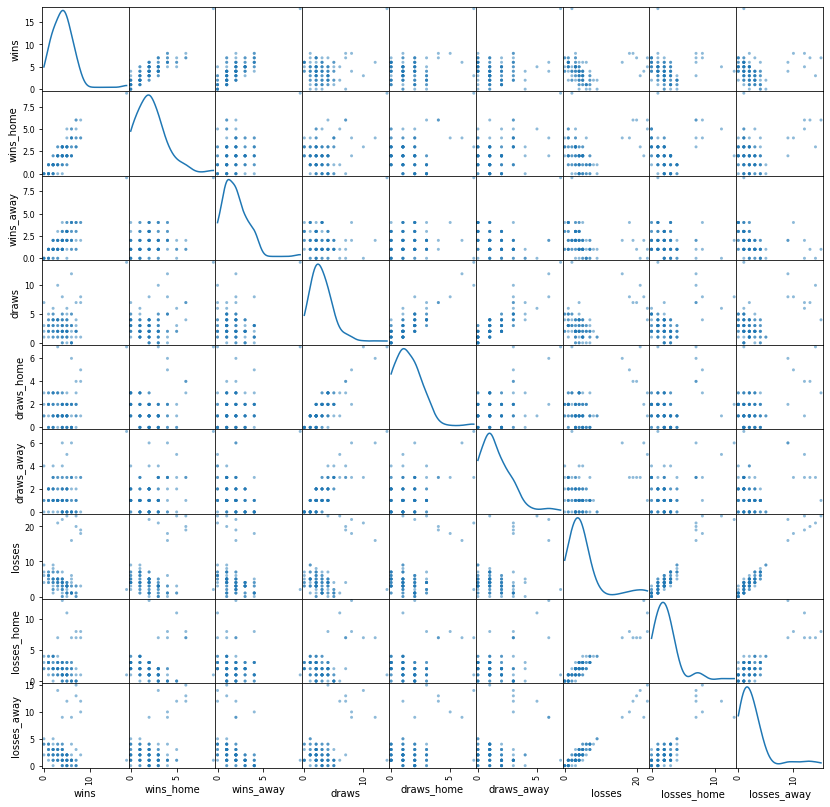

In [23]:
scatter_matrix(df_total[df_total.iloc[:,8:17].columns], diagonal='kde', figsize=(14,14));

## Build the matrix

In [24]:
df_all.set_index("team_name", inplace=True)
df_all = df_all.T

In [ ]:
df_teams_numerical = df_all.iloc[8:,:]

In [ ]:
df_norm = (df_teams_numerical - df_teams_numerical.min()) / (df_teams_numerical.max() - df_teams_numerical.min())

In [ ]:
X = df_norm.to_numpy()

## AA Analysis

In [ ]:
archetypal=cl.clustering.ArchetypalAnalysis(n_archetypes=5,iterations=10,tmax=300)
archetypal.fit(X)

Z=(archetypal.archetypes())

In [ ]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk', rc={ 'lines.linewidth': 6}, font_scale=1.5)

In [ ]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(np.array(Z[0,:]),np.array(Z[1,:]))
plt.show()

In [ ]:
A=archetypal.transform(X)
dp=archetypal.map2D
dat=dp @ A

f, ax = plt.subplots(figsize=(20, 10))
ax=cl.clustering.archetypal_plot(ax,dat,dp,epsilon=.1)
ax.set_aspect('auto')
plt.show()

## Create data labels

In [ ]:
teamsList = df_total['team_name']
temasColumnOrdering={x:y for y,x in enumerate(teamsList)}
labels={v: k for k, v in temasColumnOrdering.items()}

In [ ]:
df_labels = pd.DataFrame.from_dict(labels, orient='index').reset_index(drop=True)

In [ ]:
labels = df_labels.to_dict()

In [ ]:
for i in range(0,len(labels[0])):
    print("{:40}".format(labels[0][i]),end='')
    for j in A[:,i]:
        print("{:.3f} ".format(j),end='')
    print("")

## Merge Result with original dataframe

In [ ]:
df_aa_result = pd.DataFrame(data=A.T)
df_aa_result.columns = df_aa_result.columns.map(str)

In [ ]:
df_teams_with_aa = pd.concat([df_total, df_aa_result], axis=1)
df_teams_only_aa = df_teams_with_aa.iloc[:,280:]
df_teams_only_aa['common_name'] = df_teams_with_aa['common_name']

In [ ]:
df_teams_only_aa

## Save Result as Pickle file

In [ ]:
# df_teams_only_aa.to_pickle("pickle_files/df_teams_only_aa.pkl")